In [8]:
# CNN Image Classifier with Checkpoints

# Install necessary libraries
!pip install tensorflow
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [10]:
# Load dataset (for example, CIFAR-10 dataset)
# You can replace this with your own dataset or use other datasets like MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [11]:
# Normalize images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# Define class names for CIFAR-10 (replace these with your dataset's labels if using a different dataset)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# Create the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Number of classes (10 for CIFAR-10)
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-02 11:20:49.275127: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [16]:
# Data Augmentation for the training images (optional but recommended)
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen.fit(train_images)

In [17]:
# Train the model with validation data and save the best model based on validation loss
history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[checkpoint_cb]  # Save best model checkpoint
)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2491 - loss: 1.9994 

2025-02-02 11:21:36.681236: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.



Epoch 1: val_loss improved from inf to 1.52225, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 61ms/step - accuracy: 0.2492 - loss: 1.9992 - val_accuracy: 0.4408 - val_loss: 1.5222
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3952 - loss: 1.6560 
Epoch 2: val_loss improved from 1.52225 to 1.41526, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.3952 - loss: 1.6559 - val_accuracy: 0.4956 - val_loss: 1.4153
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4493 - loss: 1.5238 
Epoch 3: val_loss improved from 1.41526 to 1.33311, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.4493 - loss: 1.5238 - val_accuracy: 0.5297 - val_loss: 1.3331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4787 - loss: 1.4558 
Epoch 4: val_loss improved from 1.33311 to 1.25381, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.4787 - loss: 1.4557 - val_accuracy: 0.5520 - val_loss: 1.2538
Epoch 5/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5014 - loss: 1.4005 
Epoch 5: val_loss improved from 1.25381 to 1.21808, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5014 - loss: 1.4005 - val_accuracy: 0.5598 - val_loss: 1.2181
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5103 - loss: 1.3657 
Epoch 6: val_loss improved from 1.21808 to 1.20910, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5103 - loss: 1.3657 - val_accuracy: 0.5731 - val_loss: 1.2091
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5216 - loss: 1.3308 
Epoch 7: val_loss improved from 1.20910 to 1.19229, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5216 - loss: 1.3308 - val_accuracy: 0.5837 - val_loss: 1.1923
Epoch 8/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5384 - loss: 1.3016 
Epoch 8: val_loss improved from 1.19229 to 1.06342, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.5384 - loss: 1.3016 - val_accuracy: 0.6268 - val_loss: 1.0634
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5440 - loss: 1.2768 
Epoch 9: val_loss did not improve from 1.06342
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5440 - loss: 1.2768 - val_accuracy: 0.6141 - val_loss: 1.1173
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5461 - loss: 1.2679 
Epoch 10: val_loss improved from 1.06342 to 1.06143, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5461 - loss: 1.2679 - val_accuracy: 0.6209 - val_loss: 1.0614


In [18]:
# Load the best model after training (from the checkpoint)
best_model = tf.keras.models.load_model('best_model.h5')

In [19]:
# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

2025-02-02 11:29:14.008634: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - 8ms/step - accuracy: 0.6209 - loss: 1.0614
Test accuracy: 0.6208999752998352


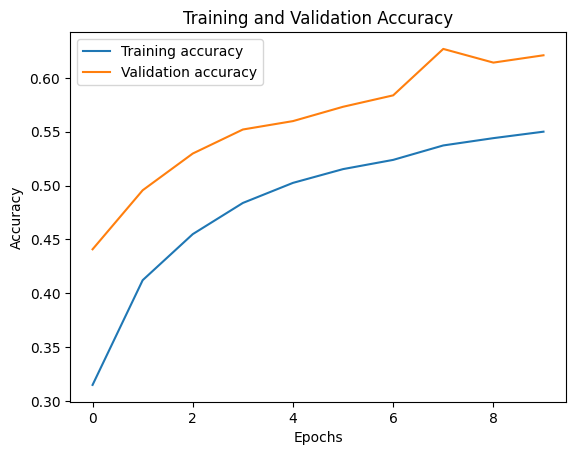

In [20]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

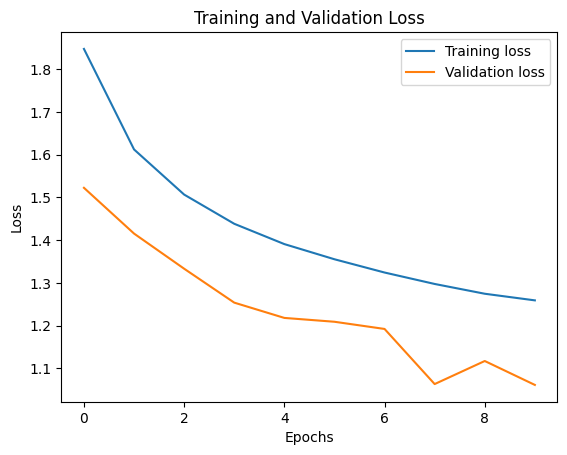

In [21]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()